# The Best Neighborhoods in Pittsburgh

## Introduction
When moving to a new city, finding the right neighborhood is crucial. Key factors to consider include safety, recreational facilities, and educational resources. Here is an analysis of our methodology for selecting the best neighborhoods in Pittsburgh. We assigned scores to each neighborhood based on its rank in the respective sub-metric and then multiplied it by its corresponding weight to obtain the overall score for the neighborhood. Finally, we ranked the neighborhoods based on their total scores to identify the top neighborhoods in Pittsburgh.A neighborhood that scores well in these areas is often a great choice, as it promises a secure and enriching environment. Safety ensures a peaceful living space, recreational facilities offer leisure and health benefits, and good educational resources contribute to the overall development of families, especially those with children.

## Metrics 
We used three metrics: total arrests, total parks, and the ratio of gifted students to enrolled students. Among these, we considered security as the most crucial factor and assigned a weight of 50% to it, 30% to parks, and the remaining 20% to the students.

## Datasets
* Arrests: This dataset contains information on people taken into custody by City of Pittsburgh police officers. This is the most important metric because nobody wants to live in a crime-ridden neighborhood, even if it has a lot of parks. https://data.wprdc.org/dataset/arrest-data

* Parks: This dataset contains information on parks in Pittsburgh neighborhoods. Parks play a crucial role in enhancing the quality of life in a neighborhood. They provide recreational spaces and facilities for residents, making them an important factor in determining the overall quality of a neighborhood. https://data.wprdc.org/dataset/parks

* K-12 Students: This dataset contains K-12 enrollment information from all neightborhoods. The number of gifted K-12 students can reflect the educational resources available in each neighborhood. We assume that neighborhoods with more gifted students have better or more schools. This is a crucial factor for students and their parents. https://data.wprdc.org/dataset/pittsburgh-public-schools-individualized-education-plan-iep

In [57]:
# Initialize the project by importing dependencies, loading datasets, and creating the final score dataframe.

import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

neighborhoods = geopandas.read_file("neighborhoods/neighborhoods.shp")

arrest_data = pd.read_csv("datasets/incidents.csv")
park_data = pd.read_csv("datasets/parks.csv")
edu_data = pd.read_csv("datasets/education.csv")

neighborhood_scores = pd.DataFrame(columns=["arrest_score", "park_score", "edu_score", "total_score"])

# Arrests

We determined arrests to be the most important metric, so it was given a 50% weight in the final score calculation. We used the Arrests dataset from WPRDC, it contains information on people taken into custody by City of Pittsburgh police officers. https://data.wprdc.org/dataset/arrest-data

### Code

In [58]:
# Count and sort by the number of arrests in each neighborhood.
arrest_ranking = arrest_data['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending=True)

# The score is a normalized measure of the number of arrests in each neighborhood, allowing for a comparison of neighborhoods.
neighborhood_scores["arrest_score"] = 100 * (arrest_ranking.max() - arrest_ranking) / (arrest_ranking.max() - arrest_ranking.min())

# Get the top 20 neighborhoods with the lowest number of arrests.
arrest_top20 = arrest_ranking.iloc[:20]

# Show the data.
print(arrest_top20)

INCIDENTNEIGHBORHOOD
Swisshelm Park       1
Outside County       1
New Homestead        1
Ridgemont            2
Chartiers City       2
Regent Square        2
Arlington Heights    3
Summer Hill          4
Mount Oliver         4
St. Clair            5
Polish Hill          5
Allegheny West       5
South Shore          6
Spring Garden        7
Oakwood              7
Glen Hazel           7
Friendship           7
Point Breeze         8
Esplen               8
Hays                 8
Name: count, dtype: int64


### Graph

Text(0.5, 0, 'Number of Arrests')

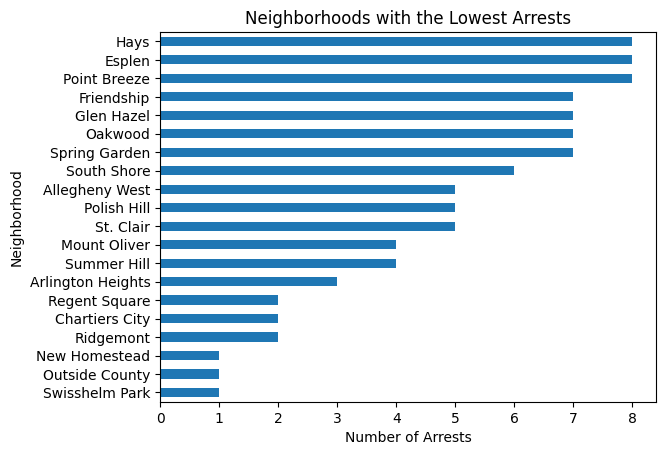

In [59]:
# Plot the top 20 neighborhoods.
arrest_plot = arrest_top20.plot(kind='barh', title='Neighborhoods with the Lowest Arrests')
plt.ylabel("Neighborhood")
plt.xlabel("Number of Arrests")

### Map

<Axes: >

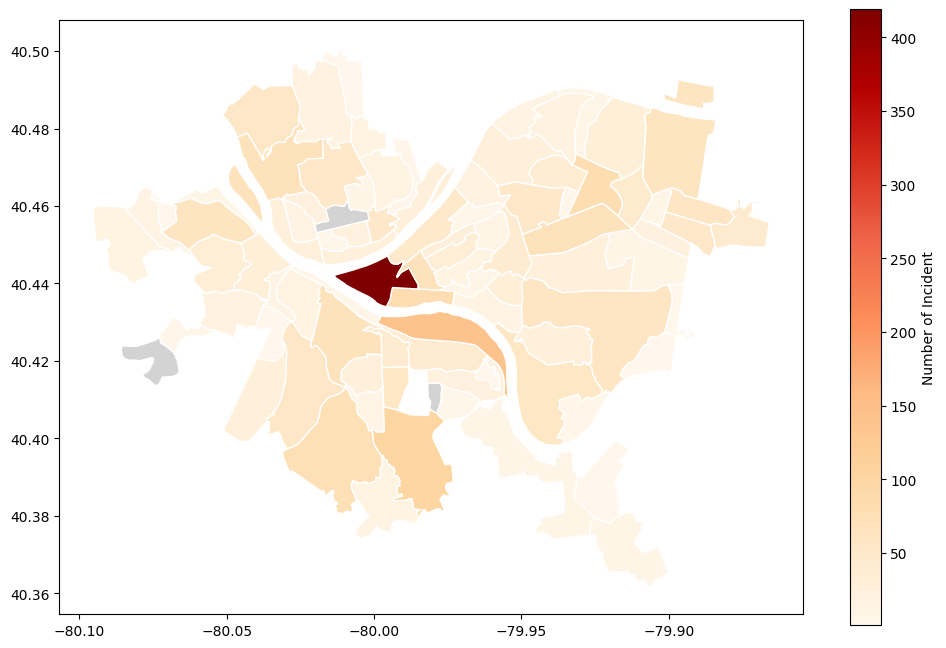

In [60]:
# Merge the neighborhoods shape file with the arrest data.
arrest_map = neighborhoods.merge(
    arrest_ranking,
    left_on='hood',
    right_index=True,
    how='left'
)

# Plot the map.
arrest_map.plot(column='count',
               cmap='OrRd',
               edgecolor="white",
               legend=True,
               legend_kwds={'label': "Number of Incident"},
               figsize=(12, 8),
               missing_kwds={"color": "lightgrey"}
            )

### Conclusion

Based on arrest data alone, Swisshelm Park and New Homestead are the best neighborhoods to live in the City of Pittsburgh, with Regent Square, Chartiers City, and Ridgemont following.

# Parks

We determined parks to be the second most important metric, so it was given a 30% weight in the final score calculation. We used the Parks dataset from WPRDC, it contains information on parks in Pittsburgh neighborhoods. Parks play a crucial role in enhancing the quality of life in a neighborhood. They provide recreational spaces and facilities for residents, making them an important factor in determining the overall quality of a neighborhood. https://data.wprdc.org/dataset/parks

### Code

In [61]:
# Count and sort by the number of parks in each neighborhood.
park_ranking = park_data["neighborhood"].value_counts().sort_values(ascending=False)

# The score is a normalized measure of the number of parks in each neighborhood, allowing for a comparison of neighborhoods.
neighborhood_scores["park_score"] = 100 * (1 - ((park_ranking.max() - park_ranking) / (park_ranking.max() - park_ranking.min())))

# Get the top 20 neighborhoods with the highest number of parks.
park_top20 = park_ranking.iloc[:20]

# Show the data.
print(park_top20)

neighborhood
East Liberty                 12
Central Business District    10
Beechview                     8
South Side Slopes             7
Point Breeze                  7
Squirrel Hill South           6
Mount Washington              6
Sheraden                      6
Hazelwood                     6
South Side Flats              6
South Oakland                 5
Troy Hill                     5
Marshall-Shadeland            4
Elliott                       4
Central Oakland               4
Brighton Heights              4
Garfield                      3
Greenfield                    3
North Shore                   3
Central Northside             3
Name: count, dtype: int64


### Graph

Text(0.5, 0, 'Number of Parks')

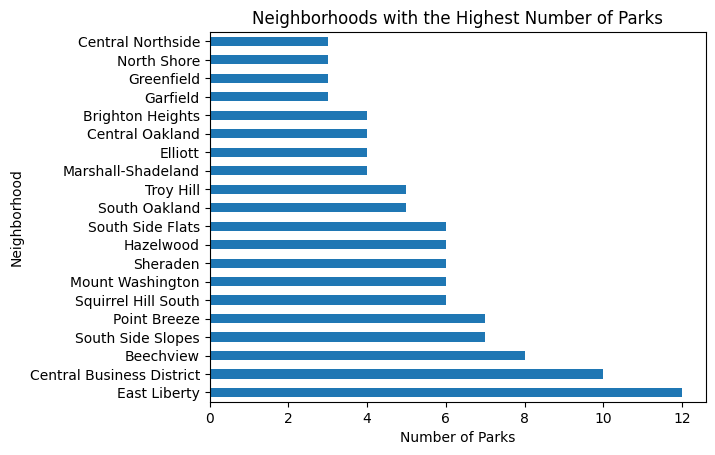

In [62]:
# Plot the top 20 neighborhoods.
park_plot = park_top20.plot(kind='barh', title='Neighborhoods with the Highest Number of Parks')
plt.ylabel("Neighborhood")
plt.xlabel("Number of Parks")

### Map

<Axes: >

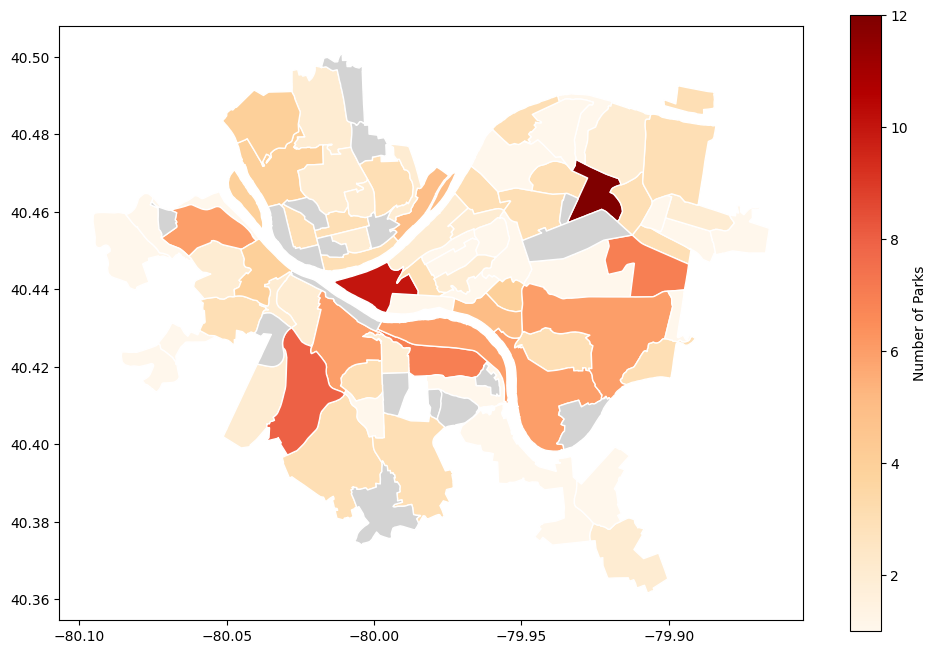

In [63]:
# Merge the neighborhoods shape file with the park data.
park_map = neighborhoods.merge(
    park_ranking,
    left_on='hood',
    right_index=True,
    how='left'
)

# Plot the map.
park_map.plot(column='count',
              cmap='OrRd',
              edgecolor="white",
              legend=True,
              legend_kwds={'label': "Number of Parks"},
              figsize=(12, 8),
              missing_kwds={"color": "lightgrey"}
            )

### Conclusion

Based on park data alone, East Liberty, Downtown, and Beechview are the best neighborhoods to live in the City of Pittsburgh.

# K-12 Education

We determined arrests to be the third most important metric, so it was given a 20% weight in the final score calculation. We used PPS's Individualized Education Plan dataset from WPRDC, it contains K-12 enrollment information from all neightborhoods. The number of gifted K-12 students can reflect the educational resources available in each neighborhood. We assume that neighborhoods with more gifted students have better or more schools. This is a crucial factor for students and their parents. https://data.wprdc.org/dataset/pittsburgh-public-schools-individualized-education-plan-iep

### Code

In [64]:
# Calculate the ratio of gifted students to total enrollment for each neighborhood.
edu_data['gifted_ratio'] = edu_data['gifted'] / edu_data['total_enrollment_k_12']

# Sort the neighborhoods by the ratio of gifted students to total enrollment.
edu_ranking = edu_data.set_index('neighborhoods')['gifted_ratio'].sort_values(ascending = False)

# The score is a normalized measure of the ratio of gifted students in each neighborhood, allowing for a comparison of neighborhoods.
neighborhood_scores["edu_score"] = 100 * (1 - ((edu_ranking.max() - edu_ranking) / (edu_ranking.max() - edu_ranking.min())))

# Get the top 20 neighborhoods with the highest ratio of gifted students.
edu_top20 = edu_ranking.iloc[:20]

# Show the data.
print(edu_top20)

neighborhoods
Squirrel Hill North      0.329268
Swisshelm Park           0.322237
Regent Square            0.322237
Squirrel Hill South      0.322237
Point Breeze             0.316993
Highland Park            0.217277
Greenfield               0.180467
Bloomfield               0.147766
Friendship               0.147766
Point Breeze North       0.147287
South Side Flats         0.137615
Upper Lawrenceville      0.136170
Central Lawrenceville    0.136170
Central Northside        0.134328
Shadyside                0.130000
Brookline                0.107014
Stanton Heights          0.104235
Morningside              0.096970
Perry North              0.092697
Lower Lawrenceville      0.081481
Name: gifted_ratio, dtype: float64


### Graph

Text(0.5, 0, 'Ratio of Gifted Students')

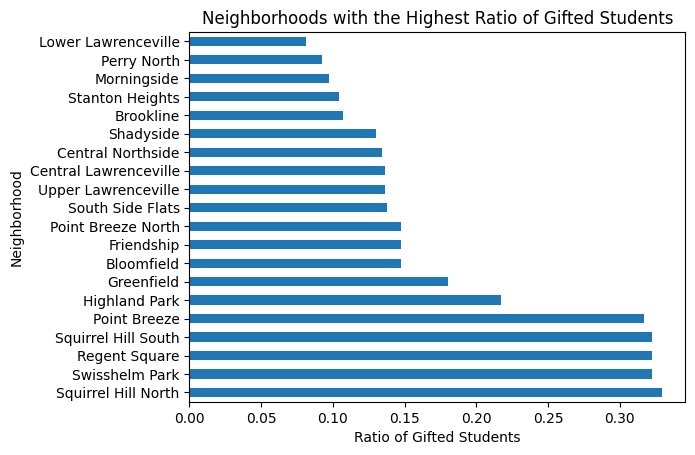

In [65]:
# Plot the top 20 neighborhoods.
edu_plot = edu_top20.plot(kind='barh', title='Neighborhoods with the Highest Ratio of Gifted Students')
plt.ylabel("Neighborhood")
plt.xlabel("Ratio of Gifted Students")

### Map

<Axes: >

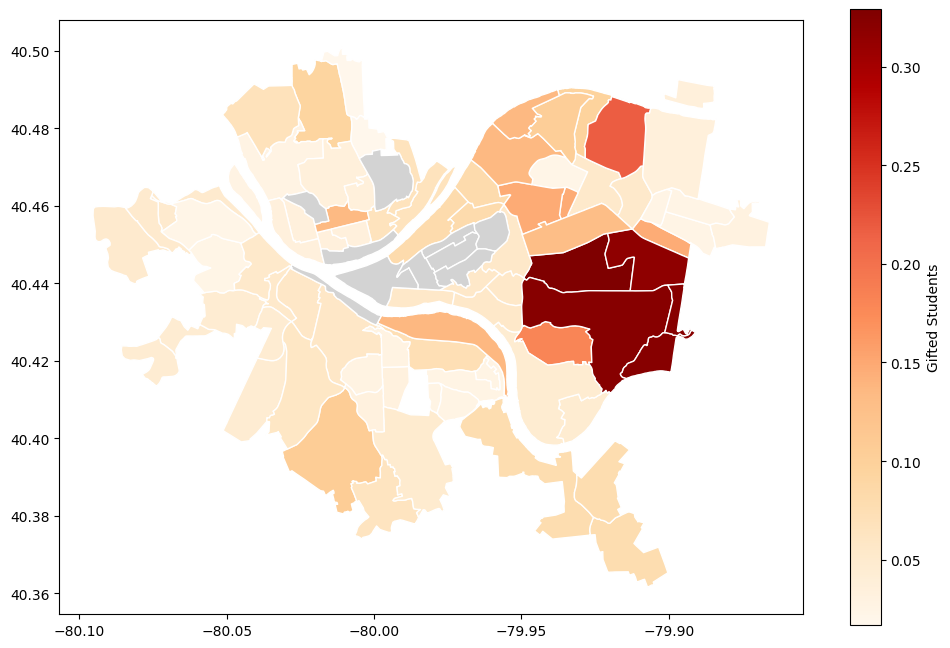

In [66]:
# Merge the neighborhoods shape file with the K-12 education data.
edu_map = neighborhoods.merge(
    edu_ranking,
    left_on='hood',
    right_on='neighborhoods',
    how='left'
)

# Plot the map.
edu_map.plot(column='gifted_ratio',
              cmap='OrRd',
              edgecolor="white",
              legend=True,
              legend_kwds={'label': "Gifted Students"},
              figsize=(12, 8),
              missing_kwds={"color": "lightgrey"}
            )

### Conclusion

Based on K-12 data alone, Squirell Hill, Swisshelm Park, and Regent Square are the best neighborhoods to live in the City of Pittsburgh.

# Overall

**Weights:**

* Arrests: 50%
* Parks: 30%
* Education: 20%

### Code

In [67]:
# Constants with weights for each metric.
arrest_weight = 0.5
park_weight = 0.3
edu_weight = 0.2

# Calculate the total score for each neighborhood.
neighborhood_scores["total_score"] = (neighborhood_scores["arrest_score"] * arrest_weight
                                       + neighborhood_scores["edu_score"] * edu_weight
                                       + neighborhood_scores["park_score"] * park_weight)

# Sort the neighborhoods by the total score.
best_neighborhoods = neighborhood_scores.sort_values("total_score", ascending=False)

# Get the top 5 neighborhoods.
top5 = best_neighborhoods.iloc[:5]

# Show the data.
print(top5)

                      arrest_score  park_score  edu_score  total_score
INCIDENTNEIGHBORHOOD                                                  
Point Breeze             98.325359   54.545455  96.071435    84.740603
Squirrel Hill South      86.124402   45.454545  97.749637    76.248492
Swisshelm Park          100.000000   18.181818  97.749637    75.004473
East Liberty             81.100478  100.000000  11.343323    72.818904
Regent Square            99.760766    0.000000  97.749637    69.430310


### Map

<Axes: >

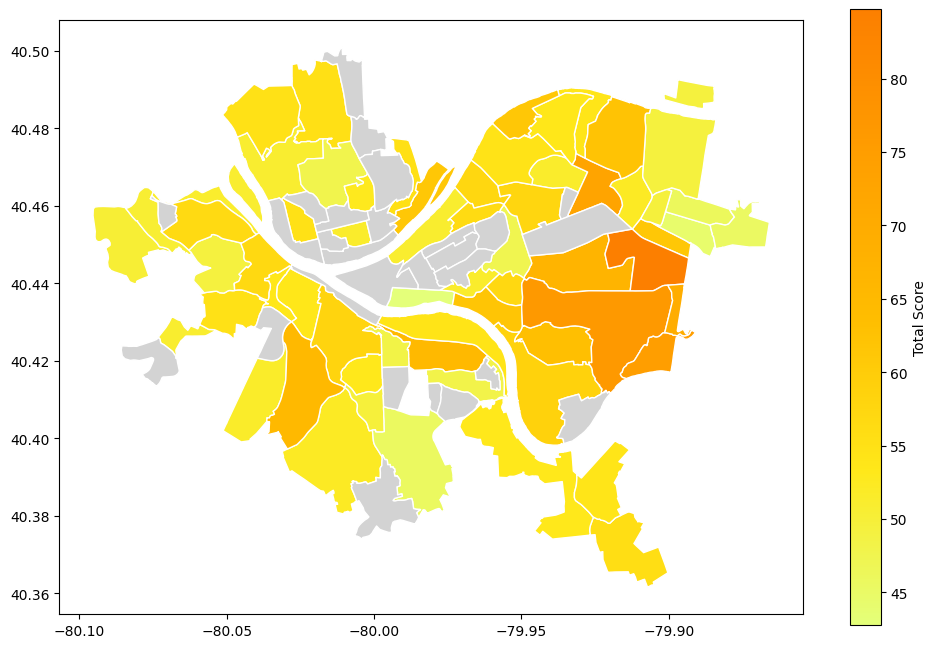

In [70]:
# Merge the neighborhoods shape file with the scores for each neighborhood.
best_map = neighborhoods.merge(neighborhood_scores, how='left', left_on='hood', right_index=True)

# Plot the map.
best_map.plot(column='total_score',
              cmap='Wistia',
              edgecolor="white",
              legend=True,
              legend_kwds={'label': "Total Score"},
              figsize=(12, 8),
              missing_kwds={"color": "lightgrey"}
            )

### Results
Based on the total score, we determined that Point Breeze is the best neighborhood in Pittsburgh according to our criteria. This is because it has a good balance of parks, gifted students, and low arrest rates in Pittsburgh. The next best neighborhoods are all clustered around Point Breeze, east of the city:

1. Point Breeze
2. Squirrel Hill
3. Swisshelm Park
4. East Liberty
5. Regent Square

### Conclusions

This data indicates that more resources seem to be allocated to neighborhoods in the east. There are many parks, few arrests, and an emphasis on academic performance in these neighborhoods. From my own knowledge, the residents in these neighborhoods tend to be wealthier than those surrounding them.